In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# load training data
X = pd.read_csv('/Users/mh/Downloads/Odd Roll Numbers/LifeExpectency_Train.csv')

In [3]:
X.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,infantDeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19Years,thinness5_9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
2,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
3,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
4,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


In [4]:
X['Status'].value_counts()

Status
Developing    2065
Developed      433
Name: count, dtype: int64

In [5]:
# Encoding , 1 for develped and 0 for developing
X['Status'] = X['Status'].replace({'Developing': 0, 'Developed': 1})




/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_11329/2101402324.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Status'] = X['Status'].replace({'Developing': 0, 'Developed': 1})


In [6]:
# load test data
y = pd.read_csv('/Users/mh/Downloads/Odd Roll Numbers/LifeExpectency_Test.csv')

In [7]:
#checking the 1st 5 rows
y.head()

,Country,Year,Status,AdultMortality,infantDeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19Years,thinness5_9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,Afghanistan,2007,Developing,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
3,Afghanistan,2006,Developing,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
4,Albania,2013,Developing,84.0,0,4.76,430.876979,99.0,0,56.5,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2


In [8]:
y['Status'] = y['Status'].replace({'Developing': 0, 'Developed': 1})

/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_11329/2070959491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Status'] = y['Status'].replace({'Developing': 0, 'Developed': 1})


In [9]:
# Summary of training dataset
X.describe()

,Year,Status,LifeExpectancy,AdultMortality,infantDeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19Years,thinness5_9Years,IncomeCompositionOfResources,Schooling
count,2498.000000,2498.000000,2491.000000,2491.000000,2498.000000,2331.000000,2498.000000,2023.000000,2498.000000,2470.000000,...,2482.000000,2300.000000,2482.000000,2498.000000,2118.000000,1.950000e+03,2470.000000,2470.000000,2356.000000,2359.000000
mean,2007.521217,0.173339,69.216138,163.488559,30.348679,4.554582,748.300412,80.739001,2606.948759,38.271579,...,82.373892,5.932848,82.147462,1.749359,7503.016115,1.325202e+07,4.850243,4.876397,0.627657,11.974905
std,4.621144,0.378616,9.508097,123.437802,116.389740,4.055521,2055.094957,25.394243,12241.820466,20.011705,...,23.631245,2.522142,23.953553,5.195645,14615.515368,6.532617e+07,4.410545,4.496453,0.209100,3.357990
min,2000.000000,0.000000,39.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.300000,72.500000,0.000000,0.830000,4.413563,77.000000,0.000000,19.300000,...,78.000000,4.260000,78.000000,0.100000,463.946903,1.925278e+05,1.600000,1.500000,0.494000,10.100000
50%,2008.000000,0.000000,72.000000,144.000000,3.000000,3.660000,63.662582,92.000000,16.000000,43.250000,...,93.000000,5.710000,93.000000,0.100000,1736.909160,1.379325e+06,3.300000,3.350000,0.677000,12.300000
75%,2012.000000,0.000000,75.600000,226.500000,22.000000,7.645000,433.327131,97.000000,349.750000,56.100000,...,97.000000,7.470000,97.000000,0.800000,5767.678275,7.442611e+06,7.200000,7.200000,0.778000,14.200000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,82.800000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.500000,28.500000,0.948000,20.700000


In [10]:
# checking the dimensions of training dataset
X.shape

(2498, 22)

In [11]:
# checking the dimensions of test dataset
y.shape

(440, 21)

In [12]:
# Checking the Null values in training dataset
X.isnull().sum()

Country                           0
Year                              0
Status                            0
LifeExpectancy                    7
AdultMortality                    7
infantDeaths                      0
Alcohol                         167
percentageExpenditure             0
HepatitisB                      475
Measles                           0
BMI                              28
under_fiveDeaths                  0
Polio                            16
TotalExpenditure                198
Diphtheria                       16
HIV_AIDS                          0
GDP                             380
Population                      548
thinness1_19Years                28
thinness5_9Years                 28
IncomeCompositionOfResources    142
Schooling                       139
dtype: int64

In [13]:
# Checking the Null values in test dataset
y.isnull().sum()

Country                           0
Year                              0
Status                            0
AdultMortality                    3
infantDeaths                      0
Alcohol                          27
percentageExpenditure             0
HepatitisB                       78
Measles                           0
BMI                               6
under_fiveDeaths                  0
Polio                             3
TotalExpenditure                 28
Diphtheria                        3
HIV_AIDS                          0
GDP                              68
Population                      104
thinness1_19Years                 6
thinness5_9Years                  6
IncomeCompositionOfResources     25
Schooling                        24
dtype: int64

In [14]:
#checking the duplicate values in training dataset
X.duplicated().sum()

0

In [15]:
# checking the duplicate values in test dataset
y.duplicated().sum()

0

In [16]:
# I found missing values in Alcohol col so I'll gonna fill the missing values 
X['Alcohol'].describe()

count    2331.000000
mean        4.554582
std         4.055521
min         0.010000
25%         0.830000
50%         3.660000
75%         7.645000
max        17.870000
Name: Alcohol, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol'>

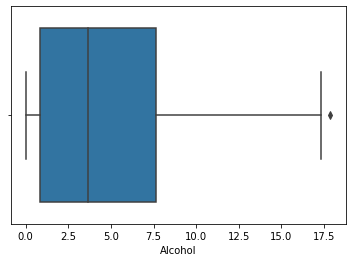

In [17]:
# Trying the find outliers but I think there are only one value so I'll leave it as it.
sns.boxplot(X['Alcohol'])

In [18]:
# Calculate the median of the 'Alcohol' column
alcohol_median = X['Alcohol'].median()

# Fill missing values in the 'Alcohol' column with the median
X['Alcohol'] = X['Alcohol'].fillna(alcohol_median)



In [19]:
# filled with median
X['Alcohol'].isnull().sum()

0

In [20]:
X['HepatitisB'].isnull().sum()

475

In [21]:
X['HepatitisB'].describe()

count    2023.000000
mean       80.739001
std        25.394243
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: HepatitisB, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HepatitisB'>

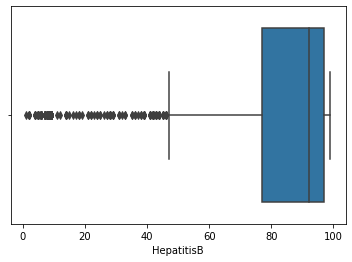

In [22]:
# trying to figure out outlier and I found some outliers 
sns.boxplot(X['HepatitisB'])

In [23]:
# Calculate the median of the column
median = X['HepatitisB'].median()

# Fill missing values incolumn with the median
X['HepatitisB'] = X['HepatitisB'].fillna(median)

In [24]:
# Calculate Q1 (25th percentile) 
Q1 = X['HepatitisB'].quantile(0.25)

# Calculate Q2 (50th percentile)
Q3 = X['HepatitisB'].quantile(0.75)

print("Q1 :", Q1)
print("Q2 :", Q3)

Q1 : 82.0
Q2 : 96.0


In [25]:
IQR = Q3 - Q1
IQR

14.0

In [26]:
# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 117.0
Lower Bound: 61.0


In [27]:
# Replace values outside the bounds with the median
X['HepatitisB'] = np.where((X['HepatitisB'] < 90) | (X['HepatitisB'] > upper_bound), np.median(X['HepatitisB']), X['HepatitisB'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HepatitisB'>

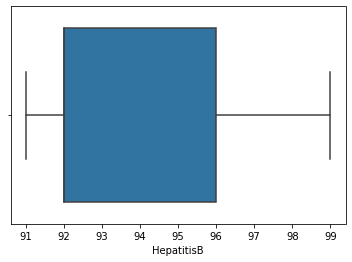

In [28]:
sns.boxplot(X['HepatitisB'])

In [29]:
X.isnull().sum()

Country                           0
Year                              0
Status                            0
LifeExpectancy                    7
AdultMortality                    7
infantDeaths                      0
Alcohol                           0
percentageExpenditure             0
HepatitisB                        0
Measles                           0
BMI                              28
under_fiveDeaths                  0
Polio                            16
TotalExpenditure                198
Diphtheria                       16
HIV_AIDS                          0
GDP                             380
Population                      548
thinness1_19Years                28
thinness5_9Years                 28
IncomeCompositionOfResources    142
Schooling                       139
dtype: int64

In [30]:
X["TotalExpenditure"].describe()

count    2300.000000
mean        5.932848
std         2.522142
min         0.370000
25%         4.260000
50%         5.710000
75%         7.470000
max        17.600000
Name: TotalExpenditure, dtype: float64

In [31]:
# Calculate the median of the column
median = X['TotalExpenditure'].median()

# Fill missing values incolumn with the median
X['TotalExpenditure'] = X['TotalExpenditure'].fillna(median)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalExpenditure'>

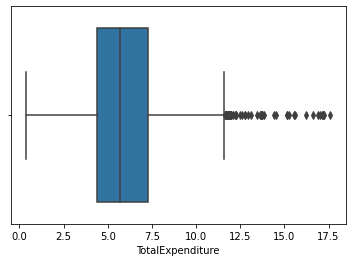

In [32]:
sns.boxplot(X['TotalExpenditure'])

In [33]:
# Calculate Q1 (25th percentile) 
Q1 = X['TotalExpenditure'].quantile(0.25)

# Calculate Q2 (50th percentile)
Q3 = X['TotalExpenditure'].quantile(0.75)

print("Q1 :", Q1)
print("Q2 :", Q3)

Q1 : 4.37
Q2 : 7.2675


In [34]:
# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 28.2675
Lower Bound: -16.63


In [35]:

# Replace values outside the bounds with the median
X['TotalExpenditure'] = np.where((X['TotalExpenditure'] < 1) | (X['TotalExpenditure'] > 10), np.median(X['TotalExpenditure']), X['TotalExpenditure'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalExpenditure'>

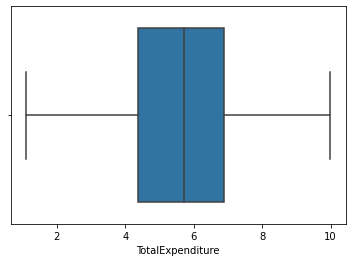

In [36]:
sns.boxplot(X['TotalExpenditure'])

In [37]:
X['GDP'].describe()

count      2118.000000
mean       7503.016115
std       14615.515368
min           1.681350
25%         463.946903
50%        1736.909160
75%        5767.678275
max      119172.741800
Name: GDP, dtype: float64

In [38]:
# Calculate the median of the column
median = X['GDP'].median()

# Fill missing values incolumn with the median
X['GDP'] = X['GDP'].fillna(median)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP'>

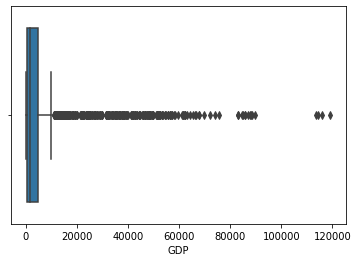

In [39]:
sns.boxplot(X['GDP'])

In [40]:
# Calculate Q1 (25th percentile) 
Q1 = X['GDP'].quantile(0.25)

# Calculate Q2 (50th percentile)
Q3 = X['GDP'].quantile(0.75)

print("Q1 :", Q1)
print("Q2 :", Q3)

Q1 : 584.2934609250001
Q2 : 4694.968123250001


In [41]:
# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 4715.968123250001
Lower Bound: 563.2934609250001


In [42]:
# Replace values outside the bounds with the median
X['GDP'] = np.where((X['GDP'] < lower_bound) | (X['GDP'] > 9700), np.median(5000), X['GDP'])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP'>

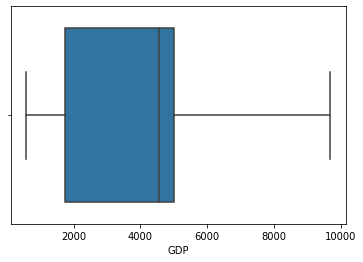

In [43]:
sns.boxplot(X['GDP'])

In [44]:
X.isnull().sum()

Country                           0
Year                              0
Status                            0
LifeExpectancy                    7
AdultMortality                    7
infantDeaths                      0
Alcohol                           0
percentageExpenditure             0
HepatitisB                        0
Measles                           0
BMI                              28
under_fiveDeaths                  0
Polio                            16
TotalExpenditure                  0
Diphtheria                       16
HIV_AIDS                          0
GDP                               0
Population                      548
thinness1_19Years                28
thinness5_9Years                 28
IncomeCompositionOfResources    142
Schooling                       139
dtype: int64

In [45]:
# Calculate the median of the column
median = X['Population'].median()

# Fill missing values incolumn with the median
X['Population'] = X['Population'].fillna(median)

In [46]:
X['Population'].describe()

count    2.498000e+03
mean     1.064744e+07
std      5.792319e+07
min      3.400000e+01
25%      3.973645e+05
50%      1.379325e+06
75%      4.612492e+06
max      1.293859e+09
Name: Population, dtype: float64

In [47]:
X.isnull().sum()

Country                           0
Year                              0
Status                            0
LifeExpectancy                    7
AdultMortality                    7
infantDeaths                      0
Alcohol                           0
percentageExpenditure             0
HepatitisB                        0
Measles                           0
BMI                              28
under_fiveDeaths                  0
Polio                            16
TotalExpenditure                  0
Diphtheria                       16
HIV_AIDS                          0
GDP                               0
Population                        0
thinness1_19Years                28
thinness5_9Years                 28
IncomeCompositionOfResources    142
Schooling                       139
dtype: int64

In [48]:
# Calculate the median of the column
median = X['Schooling'].median()

# Fill missing values incolumn with the median
X['Schooling'] = X['Schooling'].fillna(median)

In [49]:
# Calculate the median of the column
median = X['thinness5_9Years'].median()

# Fill missing values incolumn with the median
X['thinness5_9Years'] = X['thinness5_9Years'].fillna(median)

In [50]:
# Calculate the median of the column
median = X['thinness1_19Years'].median()

# Fill missing values incolumn with the median
X['thinness1_19Years'] = X['thinness1_19Years'].fillna(median)

In [51]:
X.dropna(inplace=True)

In [52]:
X.isnull().sum()

Country                         0
Year                            0
Status                          0
LifeExpectancy                  0
AdultMortality                  0
infantDeaths                    0
Alcohol                         0
percentageExpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under_fiveDeaths                0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV_AIDS                        0
GDP                             0
Population                      0
thinness1_19Years               0
thinness5_9Years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

In [53]:
print(X['Country'].dtype)

object


In [54]:
X['Country'].value_counts()

Country
Iran (Islamic Republic of)    16
Kazakhstan                    16
Papua New Guinea              16
Morocco                       16
Botswana                      16
                              ..
Viet Nam                      10
Belgium                       10
Zimbabwe                      10
Poland                         9
Montenegro                     8
Name: count, Length: 171, dtype: int64

In [55]:
X = X.iloc[:, 1:]
y = y.iloc[:,1:]

In [56]:


print(X.shape)
print(y.shape)


(2321, 21)
(440, 20)


In [57]:
X = X.dropna()
y = y.dropna()

In [58]:
y.isnull().sum()

Year                            0
Status                          0
AdultMortality                  0
infantDeaths                    0
Alcohol                         0
percentageExpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under_fiveDeaths                0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV_AIDS                        0
GDP                             0
Population                      0
thinness1_19Years               0
thinness5_9Years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

In [59]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 439
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          246 non-null    int64  
 1   Status                        246 non-null    int64  
 2   AdultMortality                246 non-null    float64
 3   infantDeaths                  246 non-null    int64  
 4   Alcohol                       246 non-null    float64
 5   percentageExpenditure         246 non-null    float64
 6   HepatitisB                    246 non-null    float64
 7   Measles                       246 non-null    int64  
 8   BMI                           246 non-null    float64
 9   under_fiveDeaths              246 non-null    int64  
 10  Polio                         246 non-null    float64
 11  TotalExpenditure              246 non-null    float64
 12  Diphtheria                    246 non-null    float64
 13  HIV_AIDS  

In [60]:
X.head()

,Year,Status,LifeExpectancy,AdultMortality,infantDeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19Years,thinness5_9Years,IncomeCompositionOfResources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,92.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,2012,0,59.5,272.0,69,0.01,78.184215,92.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.95900,3696958.0,17.9,18.0,0.463,9.8
2,2011,0,59.2,275.0,71,0.01,7.097109,92.0,3013,17.2,...,68.0,7.87,68.0,0.1,5000.00000,2978599.0,18.2,18.2,0.454,9.5
3,2010,0,58.8,279.0,74,0.01,79.679367,92.0,1989,16.7,...,66.0,9.20,66.0,0.1,5000.00000,2883167.0,18.4,18.4,0.448,9.2
4,2009,0,58.6,281.0,77,0.01,56.762217,92.0,2861,16.2,...,63.0,9.42,63.0,0.1,5000.00000,284331.0,18.6,18.7,0.434,8.9


In [61]:
y.head()

,Year,Status,AdultMortality,infantDeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,under_fiveDeaths,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1_19Years,thinness5_9Years,IncomeCompositionOfResources,Schooling
0,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2007,0,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
3,2006,0,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
4,2013,0,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2


In [62]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the training dataset
train_data = X

# Split the training data into features (X_train) and target variable (y_train)
X_train = train_data.drop(columns=['LifeExpectancy'])
y_train = train_data['LifeExpectancy']


test_data = y



# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = model.predict(test_data)


In [63]:
accuracy = model.score(X_train, y_train)
print(accuracy)

0.8341458307035627


In [65]:


from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

life_expectancy_train = train_data
life_expectancy_test = test_data

# Concatenate train and test datasets for preprocessing
data = pd.concat([life_expectancy_train, life_expectancy_test], ignore_index=True)

# Handling missing values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=np.number)), columns=data.select_dtypes(include=np.number).columns)

# Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Splitting the data back into train and test sets
train_data = data_scaled[:life_expectancy_train.shape[0]]
test_data = data_scaled[life_expectancy_train.shape[0]:]

X_train = train_data[:, 1:]  # Excluding 'Year' column
y_train = train_data[:, 0]   # Target variable 'LifeExpectancy'
X_test = test_data[:, 1:]    # Excluding 'Year' column
y_test = test_data[:, 0]     # Target variable 'LifeExpectancy'


#  Apply Bagging with SVR as base estimator on the dataset (80% training)
base_svr = SVR()
bagging_regressor = BaggingRegressor(base_estimator=base_svr, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)




RMSE: 0.8906595545938182


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.8906595545938182


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7932744421892586
